In [7]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [8]:
TRAIN_DIR='images/train'
TEST_DIR='images/test'

In [9]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [15]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [16]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [17]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [18]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [19]:
print(test['image'])

0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name: image, Length: 7066, dtype: object


In [20]:
from tqdm.notebook import tqdm

In [21]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [22]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [23]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [24]:
x_train=train_features/255.0
x_test=test_features/255.0

In [26]:
from sklearn.preprocessing import LabelEncoder  #supervised Learning used

In [27]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [28]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [29]:
y_train = to_categorical(y_train,num_classes = 7) #num classes to see how many types of faces
y_test = to_categorical(y_test,num_classes = 7)

In [30]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [31]:
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [32]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 508s 2s/step - loss: 1.8235 - accuracy: 0.2428 - val_loss: 1.8090 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 457s 2s/step - loss: 1.7961 - accuracy: 0.2512 - val_loss: 1.7308 - val_accuracy: 0.2894
Epoch 3/100
226/226 [==============================] - 456s 2s/step - loss: 1.7022 - accuracy: 0.3034 - val_loss: 1.6308 - val_accuracy: 0.3648
Epoch 4/100
226/226 [==============================] - 452s 2s/step - loss: 1.5714 - accuracy: 0.3794 - val_loss: 1.4291 - val_accuracy: 0.4379
Epoch 5/100
226/226 [==============================] - 463s 2s/step - loss: 1.4760 - accuracy: 0.4254 - val_loss: 1.3721 - val_accuracy: 0.4741
Epoch 6/100
226/226 [==============================] - 452s 2s/step - loss: 1.4156 - accuracy: 0.4528 - val_loss: 1.2951 - val_accuracy: 0.5001
Epoch 7/100
226/226 [==============================] - 456s 2s/step - loss: 1.3702 - accuracy: 0.4696 - val_loss: 1.2812 - val_accuracy:

KeyboardInterrupt: 

In [34]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

In [35]:
from keras.models import load_model

loaded_model = load_model("emotiondetector.keras")


In [36]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [37]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [38]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 1s 906ms/step
model prediction is  sad


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 54ms/step
model prediction is  sad


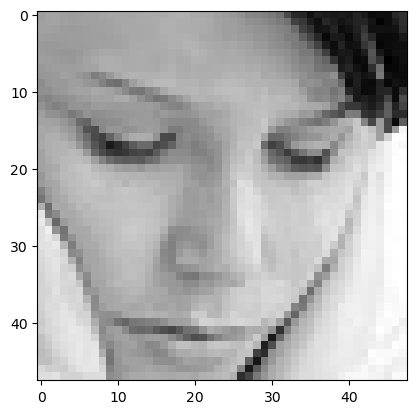

In [43]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 119ms/step
model prediction is  sad


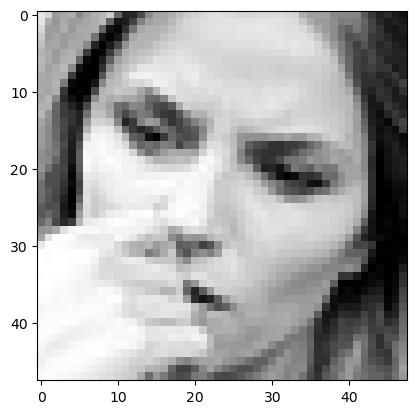

In [44]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 45ms/step
model prediction is  angry


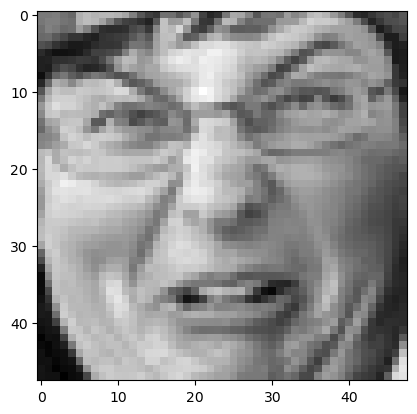

In [45]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')